Face API 실습1 : Face Detect

In [1]:
import cognitive_face as CF
import requests
from io import BytesIO
from PIL import Image, ImageDraw
import httplib, urllib, base64, json

In [2]:

# 1. 자신이 등록한 Key 값으로 변경하시오.
KEY = 'e7cbfc11af8540d3bc62b03c271b6e5f'

# 2. api를 만든 지역 주소로 변경하시오.
# 만약 미국 중서부라면 ==> https://westcentralus.api.cognitive.microsoft.com/face/v1.0/'
BASE_DOMAIN = 'eastus.api.cognitive.microsoft.com'
BASE_PATH = '/face/v1.0'
BASE_URL = 'https://' + BASE_DOMAIN + BASE_PATH + '/'  

# 2. 요청 헤더
headers = { 'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': KEY 
}

# 3. 파라미터 설정
params = urllib.urlencode({
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,accessories',
})

# 4. 분석하기 원하는 이미지 URL을 넣어주세요.
img_url = 'https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/iDy/image/gmBSAhRcnR1vyjPcTqf4dk2NHVY.jpg'
body = "{'url':'" + img_url + "'}"


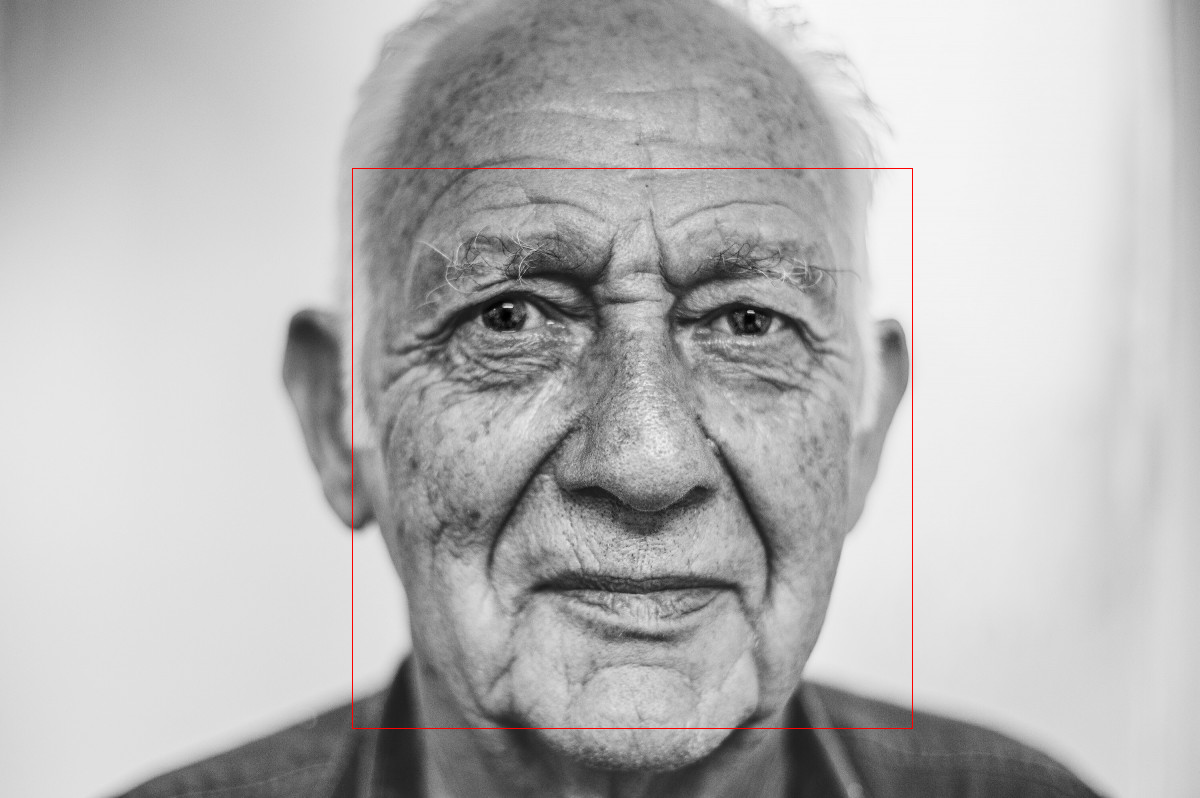

In [9]:
CF.Key.set(KEY)
CF.BaseUrl.set(BASE_URL)
faces = CF.face.detect(img_url)

# 인식된 얼굴을 사각형으로 표시하는 함수
def getRectangle(faceDictionary):
    rect = faceDictionary['faceRectangle']
    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']
    return ((left, top), (bottom, right))


# 4. 이미지를 다운로드 받기.
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# 5. 이미지 위에 빨간 box 표시하기
draw = ImageDraw.Draw(img)
for face in faces:
    draw.rectangle(getRectangle(face), outline='red')

# 6. 그림판으로 열어봅시다.
img

In [3]:

try:
    # 5. REST API 호출 및 결과 받기
    conn = httplib.HTTPSConnection(BASE_DOMAIN)
    conn.request("POST", BASE_PATH + "/detect?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
    

    # 6. 결과를 JSON구조로 print
    parsed = json.loads(data)
    print ("Response:")
    print (json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()

except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))


Response:
[
  {
    "faceAttributes": {
      "accessories": [
        {
          "confidence": 0.88, 
          "type": "glasses"
        }
      ], 
      "age": 77.7, 
      "emotion": {
        "anger": 0.0, 
        "contempt": 0.001, 
        "disgust": 0.0, 
        "fear": 0.0, 
        "happiness": 0.528, 
        "neutral": 0.471, 
        "sadness": 0.0, 
        "surprise": 0.0
      }, 
      "facialHair": {
        "beard": 0.0, 
        "moustache": 0.1, 
        "sideburns": 0.0
      }, 
      "gender": "male", 
      "glasses": "ReadingGlasses", 
      "hair": {
        "bald": 0.84, 
        "hairColor": [], 
        "invisible": false
      }, 
      "headPose": {
        "pitch": 0.0, 
        "roll": -1.5, 
        "yaw": 4.7
      }, 
      "makeup": {
        "eyeMakeup": false, 
        "lipMakeup": false
      }, 
      "smile": 0.528
    }, 
    "faceId": "b001ec4c-d7ea-43dc-bd71-7f6cc4020d78", 
    "faceRectangle": {
      "height": 560, 
      "left": 352,